In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

def traverse_directory_and_count_nodes_edges(graph_jsonl_path):
    result = []
    node_counts = []
    edge_counts = []
    
    graph = pd.read_json(graph_jsonl_path, lines=True)
    # # Traverse the directory and its subdirectories
    # for root, dirs, files in os.walk(directory):
    #     # Check if "graph.json" exists in the current directory
    #     if "graph.json" in files:
    #         # Construct the full path to the "graph.json" file
    #         graph_file_path = os.path.join(root, "graph.json")
            
    #         # Read the JSON file
    #         with open(graph_file_path, 'r') as f:
    #             graph = json.load(f)
            
    #         # Extract the number of nodes and edges
    #         num_nodes = len(graph["nodes"])
    #         num_edges = len(graph["connectivity"][0])
            
    #         # Append to the lists for histogram plotting
    #         node_counts.append(num_nodes)
    #         edge_counts.append(num_edges)
            
    #         # Get the name of the current subdirectory
    #         subdir_name = os.path.basename(root)
            
    #         # Store the result in the dictionary
    #         result[subdir_name] = {
    #             "nodes": num_nodes,
    #             "edges": num_edges
    #         }

    for i in range(len(graph)):
        num_nodes = len(graph["nodes"][i])
        num_edges = len(graph["connectivity"][i][0])
        node_counts.append(num_nodes)
        edge_counts.append(num_edges)
        result.append({
            "nodes": num_nodes,
            "edges": num_edges
        })
    
    return result, node_counts, edge_counts

import matplotlib.pyplot as plt
from collections import Counter

def plot_histograms(node_counts, edge_counts):
    plt.figure(figsize=(12, 5))
    
    # Node Counts Subplot
    plt.subplot(1, 2, 1)
    node_counter = Counter(node_counts)
    unique_nodes = sorted(node_counter.keys())
    node_frequencies = [node_counter[val] for val in unique_nodes]
    plt.bar(unique_nodes, node_frequencies, color='blue', alpha=0.7)
    plt.title("Histogram of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Frequency")
    for x, y in zip(unique_nodes, node_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_nodes, [str(val) for val in unique_nodes], rotation=45)
    
    # Edge Counts Subplot
    plt.subplot(1, 2, 2)
    edge_counter = Counter(edge_counts)
    unique_edges = sorted(edge_counter.keys())
    edge_frequencies = [edge_counter[val] for val in unique_edges]
    plt.bar(unique_edges, edge_frequencies, color='red', alpha=0.7)
    plt.title("Histogram of Edge Counts")
    plt.xlabel("Number of Edges")
    plt.ylabel("Frequency")
    for x, y in zip(unique_edges, edge_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_edges, [str(val) for val in unique_edges], rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage
current_directory = '/data/LPJ/ICML25/GraphCoder/ablation_study/fine_tune_text_LLM_with_original_graph/1989_stage2_400/verified_graphs.jsonl'  # Get the current working directory
result_dict, node_counts, edge_counts = traverse_directory_and_count_nodes_edges(current_directory)


In [2]:
print(node_counts), print(edge_counts)


[11, 8, 8, 11, 11, 8, 7, 9, 9, 6, 6, 8, 5, 2, 8, 9, 6, 7, 7, 6, 13, 13, 6, 8, 11, 7, 13, 9, 7, 6, 11, 8, 13, 3, 7, 8, 8, 13, 6, 8, 14, 13, 7, 5, 9, 9, 6, 9, 11, 8, 10, 8, 13, 8, 9, 8, 10, 8, 8, 16, 7, 9, 12, 9, 6, 7, 7, 9, 6, 5, 13, 7, 8, 14, 7, 9, 6, 11, 13, 8, 14, 8, 11, 9, 8, 9, 5, 8, 8, 11, 6, 10, 10, 7, 10, 8, 4, 13, 8, 8, 6, 7, 10, 9, 7, 6, 9, 10, 11, 8, 8, 13, 9, 9, 6, 11, 9, 9, 7, 8, 9, 8, 14, 8, 13, 7, 7, 10, 8, 8, 9, 13, 7, 9, 16, 8, 2, 5, 17, 8, 3, 13, 9, 11, 8, 10, 5, 9, 8, 9, 10, 8, 5, 7, 8, 8, 8, 13, 10, 2, 8, 15, 14, 8, 18, 9, 11, 8, 8, 11, 19, 6, 11, 10, 8, 9, 7, 5, 7, 10, 8, 7, 10, 5, 10, 6, 7, 8, 9, 11, 8, 8, 13, 26, 9, 8, 10, 12, 13, 9, 10, 11, 7, 7, 13, 16, 9, 7, 8, 8, 8, 7, 10, 5, 9, 8, 10, 8, 7, 12, 6, 8, 10, 9, 5, 5, 7, 9, 8, 9, 8, 5, 9, 7, 7, 6, 11, 9, 14, 9, 7, 12, 9, 10, 8, 10, 13, 8, 8, 13, 11, 6, 7, 10, 7, 6, 8, 11, 6, 10, 8, 6, 11, 9, 9, 7, 11, 10, 9, 13, 8, 7, 5, 6, 13, 6, 9, 13, 24, 10, 11, 13, 7, 9, 7, 11, 8, 18, 7, 13, 13, 8, 8, 9, 8, 14, 10, 7, 8, 7, 1

(None, None)

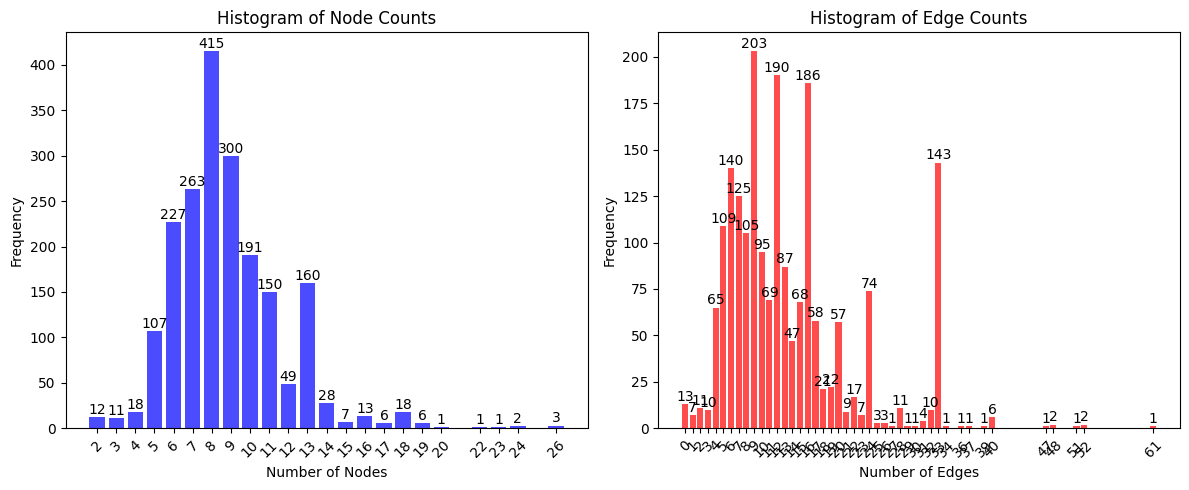

In [3]:
# Plot histograms
plot_histograms(node_counts, edge_counts)